# Anti-cancer activity prediction 💊

## Problem Formulation 🧐 🤓 
This competition is a bioassay task for anticancer activity prediction, where each chemical compound is represented as a graph, with atoms representing nodes and bonds as edges. A chemical compound is positive against non-small cell lung cancer, or negative otherwise. Up to this point, you have learned various tricks and mechanisms to be used for building neural networks/tuning models.

### What is the input?✍️ 
the input data is a graph that represent chemical compound 💊

The atoms of the chemical compound representing nodes and bonds as edges
It is a bioassay task for anticancer activity prediction

### What is the output?✍️ 
The main output is the label of anticancer activity prediction task 🔥

the label represent if the chemical compound is positive against non-small cell lung cancer, or negative:
1 for positive
0 for negative


### What data mining function is required?✍️ 

Data split.
Data plot and visualization.
Data Tokenizer.
Data Padding.
Reshape.
Data resample.
Data Concat.
Embedding and Dense layers.

### What could be the challenges?👀 

Developing a successful solution to our problem , complex data,datasets can include complex data elements ,another thing is that we have to make sure that our algorithm must be efficient and scalable to extract information from the big data and we should have enough knowledge and experience in order to use them if we needed to improve our algorithms.
The dataset is not clean, and we need some preprocessing depending on the models we choice,

### What is the impact?👀 

It will make a great impact when it comes to medical field as it is going to predict wether chemical compunds are positive or negative in terms of lung cancer resistence

also model will fit well on the training data and predict well on the test data or any data that we enter, And that will have a huge impact in real life if that uesd we will be able to predict right.

### What is an ideal solution?👀 
An ideal solution in my opinion will be measured in terms of metrics and performances

Some of the possible solutions are:

Dealing with unbalanced data by up-sampling it
Preprocess text data (that represent the atom name in the chemical compound) before dealing with them

### What is the experimental protocol used and how was it carried out?👀 
After loading the data and cleaning and preprocessing it, the experimental protocol used is spliting the training dataset into training_set and validation_set to fit the model using the new training_set and measure the perormance (AUROC) of the model using the validation_set and then make the prediction by using the original test dataset 🔥

the probability of the output class is calculated using a graph convolutional network. Message passing methods are implemented differently in different approaches, such as:

GGNN : means Gated Graph Neural Networks

RGCN : (Graph convolution layers)

GNN-Edge-MLP : Graph Neural Network with Edge MLPs

RGAT : Relational Graph Attention Networks

RGIN: Message propagation layer of the Relation Graph Isomorphism Network


###  What are the input tensors to the neural network model (their meaning, not just symbol)? What is each of their dims and their meaning (e.g. batch_size)?👀 

The input tensors in this network are:

**data**: The data contains the nodes of the chemical compound in the tokenized form. Nodes for each compound are extracted, then they are tokenized using the tokenizer and finally padding is done using pad_sequence method. The shape for each batch is [batch_size*max_len_nodes], where batch_size is the number of samples in the batch and max_len_nodes is the length of tokenized nodes after padding is done.

**edge:** edge is the input tensor which carries information about connections between atoms. The shape of edge is [sum_of_all_edges,2]. The sum_of_all_edges represents the sum(no. of edges of each sample) of the batch_size. For example in a batch of 3 samples, the number of edges in sample 1: 21, sample 2: 20 and sample 3: 40. So the size of edge tensor would be [81,2].

node2graph: It is the input tensor which is used for segmented mean and contains information about segmented ids. The shape for each batch is [batch_size*max_len_nodes], where batch_size is the number of samples in the batch and max_len_nodes is the length of tokenized nodes after padding is done.





###  For each dim of gnn_out, what does it symbolize? For each dim of avg, what does it symbolize?👀 🤩 


**gnn_out:**
The GNN output is a tensor of shape (batch_size, num_nodes, hidden_size). Each row of the tensor represents the hidden state of a single node in the graph. The hidden state of a node is a vector that contains information about the node's neighbors and the 
edges that connect it to its neighbors.

**avg:**
Average takes the segmented mean of the gnn_out based on the segmented ids. For each sample in the batch_size, the output of gnn_out is [tokenized_vector_dimension, hidden_layers]. Each sample has one segment id. Thus the segment_mean takes the mean of all the output data in the gnn_out output and represents one sample with one number for each hidden layer. The final output of the avg tensor is of shape [batch_size, hidden_layer]. It is a way of collecting information for each sample and representing it in the form of mean data.

The first dimension of the GNN output tensor represents the batch size. The second dimension represents the number of nodes in the graph. The third dimension represents the hidden size of the GNN.

The first dimension of the average pooling output tensor represents the batch size. The second dimension represents the number of groups. The third dimension represents the hidden size of the GNN divided by the number of groups.

The number of groups is a hyperparameter that can be tuned to improve the performance of the GNN. A larger number of groups will result in a smaller average pooling output tensor, but it will also reduce the amount of information that is preserved. A smaller number of groups will result in a larger average pooling output tensor, but it will also preserve more information.

The optimal number of groups depends on the size of the graph and the complexity of the task that the GNN is being used for.


### What is the difference between segment_mean and tf.reduce_mean? For each dim of pred, what does it symbolize?👀 🤩 🤩 

The main difference between segment_mean and tf.reduce_mean is that segment_mean takes a segment_ids tensor as input, while tf.reduce_mean does not. The segment_ids tensor is a tensor of the same shape as the data tensor, and it contains the segment id for each element of the data tensor. The segment id is a number that identifies the segment that the element belongs to.

Segment_mean computes the mean of the elements in each segment, while tf.reduce_mean computes the mean of all the elements in the data tensor.

pred: The final output (pred) tells about the probability of a chemical compound to be active for the cancer cell or not. The shape of pred is [batch_size,1]. Thus for each sample, the final output is a number which represents the probability associated with each chemical compound about its activity.

### What is the motivation/theory/idea to use multiple gcn layers comparing to just one? How many layers were used in the template?👀 🤩 

Expanding the neighbourhood for label propagation by adding multiple GCN layers can improve geolocation by accessing information from friends that are multiple hops away, but it might also lead to propagation of noisy information to users from an exponentially increasing number of expanded neighbourhood members. To control the required balance of how much neighbourhood information should be passed to a node, we use layer-wise gates similar to highway networks.

there is two layers used in the template.


### Based on the provided template, describe the format of the input file (sdf file)👀 🤩 

SDF stands for data file structure , the file has data about chemicals compounds , every molecule has a section with its name, connections or bonds, version num.. etc .
They are frequently used for sharing libraries of compound structure data.A compound record contains several distinct sections. First, there is a three-line header block. These three lines may contain:

1)The name of the molecule

2)Details of the software used to generate the compound structure

3)A comment

We used those to get information about the compound and saving them as edges and nodes. Each node is the atom given in the chemical molecule.

Each row of this matrix represents a node of the graph. To assign initial features to each of these nodes, the input layer applies a linear transformation (also called projection) to the one-hot vectors which encode the node representations. Giving a brief recap of the linear transformation.

An SDF file contains a database which is usually called compact relational database. An SDF file contains all the database related information and the SQL Server Compact is a light weight and free database engine which is used to manage the .sdf files. The .sdf file size shouldn’t exceed the limit of 4 GB of size. The SDF files don’t store the information about stored procedures, triggers or views. Applications using an SQL CE database need not specify the path to an SDF file in the ADO.NET connection string, instead it can be mentioned as |DataDirectory|\database_name.sdf, defining the data directory being defined in the assembly manifest for the application The .sdf naming convention is optional, and any extension can be used to save the file. Setting up a password for the database file is an optional step. To compress or repair the database the file should be saved with the option of the

### Explain your understanding (based on the documentation/paper) of the mechanisms you chose.👀 🤩 

GGNN : means Gated Graph Neural Networks , Neural Networks with Gated Graphs (GG-NNs) Unroll recurrence for a defined number of steps and utilise contemporary optimization approaches to backpropagate across time.

RGCN : (Graph convolution layers) Compute new graph states by neural message passing , The concept of Graph Convolutional Networks is extended by Relational Graph Convolutional Networks (RGCN). A GCN's layers are a generalisation of convolutional layers in a CNN, where the data can have a dynamic number of neighbours rather than being set on a grid like pixels in a picture. RGCN expands GCNs to operate on multigraphs, where there are several edge types, where GraphSAGE focuses on extending GCNs to generalise by employing trainable aggregation functions. GCN layers come in a variety of shapes and sizes, with more being introduced all the

GNN-Edge-MLP : Graph Neural Network with Edge MLPs - RGCN variation in which messages on edges are generated using entire MLPs rather than simply a single layer applied to the source state.

RGAT : Relational Graph Attention Networks Compute new graph states using attention and neural message passing.

RGIN: (Message propagation layer of the Relation Graph Isomorphism Network) Use MLPs for state updates and message computation to compute new graph states using neural message forwarding.

### What preprocessing steps are used?👀 🤩 

view the data and understand it
adjust the training data to *up-sample* the positive class samples
preprocess text data through:
build vocabulary from training set using tokenizer
apply pad_sequences() function
apply prepare_single_batch for all samples in gen_batch

## Import packages📚 

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score, KFold

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, precision_score, recall_score, f1_score, precision_recall_curve
from tqdm.notebook import tqdm
import os
import math
sns.set()

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from time import time
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [3]:
from sklearn.utils import resample 
import tensorflow as tf
from tensorflow.math import segment_mean
from tensorflow import keras
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Embedding, Dense
from tensorflow.keras.optimizers import Adam


In [4]:
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dropout
from tensorflow.keras.layers import GRU, LSTM, Bidirectional

In [5]:
!pip install --quiet tf2_gnn
from tf2_gnn.layers.gnn import GNN, GNNInput
from tf2_gnn.layers.message_passing import GNN_Edge_MLP, GNN_FiLM

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 21.12.2 requires cupy-cuda115, which is not installed.
tfx-bsl 1.12.0 requires google-api-python-client<2,>=1.7.11, but you have google-api-python-client 2.83.0 which is incompatible.
tfx-bsl 1.12.0 requires pyarrow<7,>=6, but you have pyarrow 5.0.0 which is incompatible.
tensorflow-transform 1.12.0 requires pyarrow<7,>=6, but you have pyarrow 5.0.0 which is incompatible.
onnx 1.13.1 requires protobuf<4,>=3.20.2, but you have protobuf 3.19.6 which is incompatible.
apache-beam 2.44.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.6 which is incompatible.


In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
# some seeting for pandas and hvplot
pd.options.display.max_columns = 100
pd.options.display.max_rows = 300
pd.options.display.max_colwidth = 100
np.set_printoptions(threshold=2000)

## Load Data 📊 

In [8]:
# fun. to read sdf file, the chemical composition of a molecule is saved as (structure data file)
def read_sdf(file):
    with open(file, 'r') as rf:   #opening the file
        content = rf.read()       #reading the contents of the file
    # Split the read file by delimiter $$$$ thus splitting each molecule in an array
    samples = content.split('$$$$') 
    
    #fun. to read each molecule configuration
    def parse_sample(s):
        lines = s.splitlines()    #splitting the text data to lines
        links = []                #empty array for links
        nodes = []                #empty array for nodes
        label = 0
        #loop over each line
        for l in lines:           
            if l.strip() == '1.0':
                label = 1
            if l.strip() == '-1.0':
                label = 0
            # for Atom block 
            if l.startswith('    '):   
                feature = l.split()
                #node feature (atom) as O,C etc.
                node = feature[3] 
                #appending nodes    
                nodes.append(node) 
            # bond block tells about connections between atoms   
            elif l.startswith(' '):   
                # splitting line
                lnk = l.split()       
                # edge: (from, to,) (1-based index)
                if int(lnk[0]) - 1 < len(nodes):
                    #appending links
                    links.append((int(lnk[0])-1, int(lnk[1])-1,))
        return nodes, np.array(links), label #return nodes, links and label
    # parse_sample for each molecule
    return [parse_sample(s) for s in tqdm(samples) if len(s[0]) > 0]

## Load Data 📊 

In [9]:
# Loading the data from csv files
training_data= read_sdf('/kaggle/input/dataset/train.sdf')
test = read_sdf('/kaggle/input/dataset/test_x.sdf')

  0%|          | 0/25024 [00:00<?, ?it/s]

  0%|          | 0/12326 [00:00<?, ?it/s]

In [10]:
#print lenght of our data and dimension
print('length of training  data', len(training_data))
print('length of training data[0]:', len(training_data[0]))

length of training  data 25024
length of training data[0]: 3


In [11]:
# Look at first records of the data 
print(training_data [0])     

(['S', 'O', 'O', 'O', 'O', 'N', 'N', 'N', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C'], array([[ 0,  8],
       [ 0, 14],
       [ 1, 10],
       [ 2, 11],
       [ 3,  7],
       [ 4,  7],
       [ 5,  9],
       [ 5, 14],
       [ 6, 14],
       [ 6, 17],
       [ 7, 22],
       [ 8,  9],
       [ 8, 10],
       [ 9, 11],
       [10, 12],
       [11, 13],
       [12, 13],
       [12, 15],
       [13, 16],
       [15, 18],
       [16, 19],
       [17, 20],
       [17, 21],
       [18, 19],
       [20, 23],
       [21, 24],
       [22, 23],
       [22, 24]]), 0)


## **Data Visualizing** 📊 📈 

In [34]:
#Inspecting a Sample and importing necessary libraries
#Each sample's data is included in the training set (molecule).
# There are three elements in each sample array. The first one contains textual information on the atoms
# the second element contains information about the connections
# and the third element contains information about the labels for each molecule.
!pip install --quiet networkx
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import cm
colors = cm.rainbow(np.linspace(0, 1, 50))

In [13]:
#We created a function to visualize the graphs of the compound
def visualize(sample):
    G=nx.Graph()#initiating instance of our Graph
    nodes = sample[0]#atoms 
    edges = sample[1]#connections
    
    labeldict={}#we created an empty dictionary in order to put in it labels of nodes
    node_color=[]#empty list for colors of nodes
    for i,n in enumerate(nodes):# loop on each node
        G.add_node(i) #adding node to graph
        labeldict[i]=n #dictionary building with [key,value] as [0:'C']
        node_color.append(colors[hash(n)%len(colors)]) #for color

    # a list of nodes:
    for e in edges: #for each edge
        G.add_edge(e[0], e[1]) #adding egde to the graph
    #draw( ) function apllied to the graph
    nx.draw(G, labels=labeldict, with_labels = True, node_color = node_color)
    plt.show()
    
    return G #now the function returns the graph

In [14]:
 #Splitting traing data 
training_data, validation_set = train_test_split(training_data , test_size=0.15,)

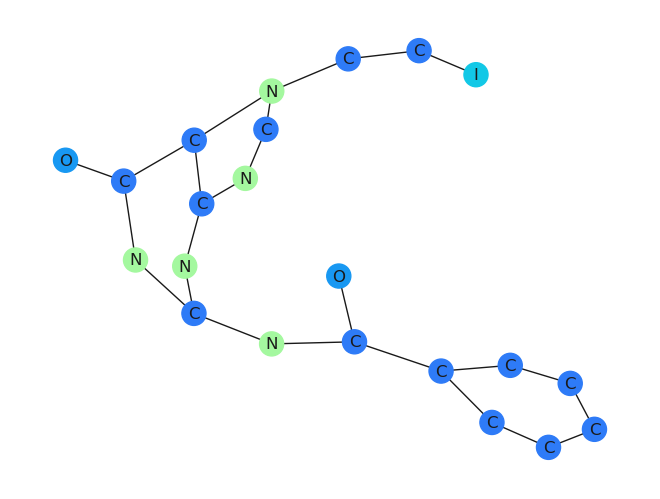

In [15]:
#displaying one sample
plt.clf()
visualize(training_data[20])

## **Plotting** 📊 📈 


In [15]:
#show the plots 
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

##  Data PreProcessing👩‍💻
## Tokenization 🔨 



In [16]:
# lets Tokenize atoms
from tensorflow.keras.preprocessing.text import Tokenizer

max_vocab = 500  #maximum vocab is now 500
max_len = 100 #maximum lenth is 100 of tokenized vector
# build vocabulary from training set
all_nodes = [s[0] for s in training_data]
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(all_nodes)

In [17]:
#importing libraries
from tensorflow.keras.preprocessing.sequence import pad_sequences
import random
random.seed(0)
#we creatd this function to prepare single batch set
#samples represents the batch of data
def prepare_single_batch(samples):
    sample_nodes = [s[0] for s in samples]
    sample_nodes = tokenizer.texts_to_sequences(sample_nodes)
    sample_nodes = pad_sequences(sample_nodes, padding='post')
    max_nodes_len = np.shape(sample_nodes)[1]  #shape: (num of samples, number of nodes)
    edges = [s[1]+i*max_nodes_len for i,s in enumerate(samples)]
    edges = [e for e in edges if len(e) > 0]  #make sure all elements are non-zero
    node_to_graph = [[i]*max_nodes_len for i in range(len(samples))]
    
    all_nodes = np.reshape(sample_nodes, -1) #concatenate nodes of all samples together
    all_edges = np.concatenate(edges)   #concatenate edges of all samples together 

    node_to_graph = np.reshape(node_to_graph, -1)
    #returns a dictionary of features(data,edges,node2grah) and label
    return {
        'data': all_nodes,
        'edges': all_edges,
        'node2grah': node_to_graph,
    }, np.array([s[2] for s in samples])


#generating batch 
def gen_batch(dataset, batch_size=16, repeat=False, shuffle=True):
    while True:
        dataset = list(dataset)
        if shuffle: # if shuffle is True
            random.shuffle(dataset) #shuffle() function shuffles randomly
        l = len(dataset) #length of dataset
        for ndx in range(0, l, batch_size): #for loop to create batches
            batch_samples = dataset[ndx:min(ndx + batch_size, l)] #creating batch samples
            yield prepare_single_batch(batch_samples) #returning a generator with prepared batches
        if not repeat:
            break #break the loop if no repeat 

In [18]:
# showing one batch:
for train_batch in gen_batch(training_data, batch_size=4):
    for k,v in train_batch[0].items():
        print(k)
        print(v)
        pass
    print('label', train_batch[1])
    break

data
[4 2 2 2 2 2 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 4 2 2 2 2 2 2 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
 0 0 0 0 2 2 2 2 2 2 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 5 5 2 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 0]
edges
[[  0  14]
 [  0  21]
 [  1  29]
 [  2  31]
 [  2  35]
 [  3  31]
 [  4  34]
 [  4  36]
 [  5  34]
 [  6  10]
 [  6  12]
 [  7  11]
 [  7  13]
 [  8  11]
 [  8  15]
 [  9  29]
 [  9  30]
 [ 10  11]
 [ 10  14]
 [ 12  13]
 [ 12  16]
 [ 13  17]
 [ 14  18]
 [ 15  23]
 [ 15  24]
 [ 16  19]
 [ 17  20]
 [ 18  22]
 [ 19  20]
 [ 21  22]
 [ 23  26]
 [ 24  27]
 [ 25  26]
 [ 25  27]
 [ 25  28]
 [ 28  29]
 [ 30  31]
 [ 30  32]
 [ 32  33]
 [ 33  34]
 [ 35  37]
 [ 36  38]
 [ 39  44]
 [ 39  45]
 [ 39  48]
 [ 39  60]
 [ 40  54]
 [ 40  64]
 [ 41  47]
 [ 42  47]
 [ 43  57]
 [ 46  49]
 [ 46  53]
 [ 47  52]
 [ 48  59]
 [ 49  50]
 [ 49  52]
 [ 50  51]
 [ 50  55]
 [ 51  53]
 [ 51  58]


# **Trial 1** 😎 

I used Graph Neural Network as this task is a bioassay task for anticancer activity prediction, where each chemical compound is represented as a graph.

I used this Graph Neural Network with the data that consider very unbalanced without apply the Up-Sampling on it

After declaring the GNNInput, I defined the hyperparameters for GNN layer by loading first the defualt hyperparameters of GNN and set hidden_dim to be 8 which represent the size of the output of all message passing layers

then adding Graph Neural Network layer with the defined hyperparameters and calculating segmented mean based on segment_ids

Finally, define the output layer of the model then building and compiling the model using BinaryCrossentropy for loss and the AUC metric to measure the performance of the network.


While fitting the model I specified the value of batch size to be 32 and the value of epochs to be 30 and used the validation_set to validate our model


From the result, we can say that unbalanced data affect the model accuracy and produce a low results

#### **Model Hyperparameters**

GNN.get_default_hyperparameters()). These hyperparameters configure the exact stack of GNN layers:

"num_layers" sets the number of GNN message passing layers (usually, a number between 2 and 16)

"message_calculation_class" configures the message passing style. This chooses the tf2_gnn.layers.message_passing.* layer used in each step.

node_features= embeded

the first input contains a vector of the words after we change it by using the function Embadding
adjacency_lists=(edge)

the edges are what conects one nodes , their dimention is an arry of two values .
node_to_graph_map=node2graph

shows how max_nodes_len,number of edges on one batch

num_graphs=num_graph

number of samples

**Epochs**: indicates the number of passes of the entire training dataset the machine learning algorithm has completed

**batch_size:** the number of training examples in one forward/backward pass.

**hidden_dim :** sets the size of the output of all message passing layers.

In [20]:
data = keras.Input(batch_shape=(None,)) # the Input layer for nodes
# the first dim is different to the previous one. it is the total number of edges in this batch
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32)#Input layer for edge 
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32) #Input layer for node2graph ids
embeded = Embedding(tokenizer.num_words, 20)(data)#embedding layer over data with each token embedded as  size vector

# number of graphs (number of samples)
num_graph = tf.reduce_max(node2graph)+1

gnn_input = GNNInput(
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)

params = GNN.get_default_hyperparameters()
params["hidden_dim"] = 8 #defining the hidden dimension with 8
# parameter message calcualation class
gnn_layer = GNN(params)  #gnn layer
gnn_out = gnn_layer(gnn_input)  #gnn output layer

print('gnn_out', gnn_out)
# https://www.tensorflow.org/api_docs/python/tf/math/segment_mean
avg = segment_mean(
    data=gnn_out,#lets calculate the segmented mean
    segment_ids=node2graph
)
print('mean:', avg)
#final layer is dense an its activation function is sigmoid
pred = Dense(1, activation='sigmoid')(avg)
print('pred:', pred)

model = Model( #building model 
    inputs={
        'data': data,
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred
)
model.summary()#display model's summary

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 8), dtype=tf.float32, name=None), name='gnn/StatefulPartitionedCall:0', description="created by layer 'gnn'")

mean: KerasTensor(type_spec=TensorSpec(shape=(None, 8), dtype=tf.float32, name=None), name='tf.math.segment_mean/SegmentMean:0', description="created by layer 'tf.math.segment_mean'")

pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense/Sigmoid:0', description="created by layer 'dense'")

Model: "model"

__________________________________________________________________________________________________

 Layer (type)                   Output Shape         Param #     Connected to                     


 input_3 (InputLayer)           [(None,)]            0           []                               

                                                                                                  

 input_1 (InputLayer)           [(None,)]            0           []               

In [21]:
#compile the model
model.compile(
    loss='BinaryCrossentropy',
    metrics=['AUC']
)

In [22]:
#fit the mdel
import math #importing math library

batch_size = 32
num_batchs = math.ceil(len(training_data) / batch_size)
num_batchs_validation = math.ceil(len(validation_set) / batch_size)

history = model.fit(
    gen_batch(
        training_data, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=30,
    validation_data=gen_batch(
        validation_set, batch_size=32, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/30

665/665 [==============================] - 17s 16ms/step - loss: 0.3380 - auc: 0.4181 - val_loss: 0.2717 - val_auc: 0.3556

Epoch 2/30

665/665 [==============================] - 8s 12ms/step - loss: 0.2394 - auc: 0.3771 - val_loss: 0.2522 - val_auc: 0.3351

Epoch 3/30

665/665 [==============================] - 8s 13ms/step - loss: 0.2179 - auc: 0.3829 - val_loss: 0.2295 - val_auc: 0.3752

Epoch 4/30

665/665 [==============================] - 9s 13ms/step - loss: 0.1996 - auc: 0.4838 - val_loss: 0.2165 - val_auc: 0.4554

Epoch 5/30

665/665 [==============================] - 8s 12ms/step - loss: 0.1919 - auc: 0.5849 - val_loss: 0.2079 - val_auc: 0.5779

Epoch 6/30

665/665 [==============================] - 8s 12ms/step - loss: 0.1904 - auc: 0.5919 - val_loss: 0.1990 - val_auc: 0.6160

Epoch 7/30

665/665 [==============================] - 8s 12ms/step - loss: 0.1878 - auc: 0.6239 - val_loss: 0.1989 - val_auc: 0.6190

Epoch 8/30

665/665 [==============================] -

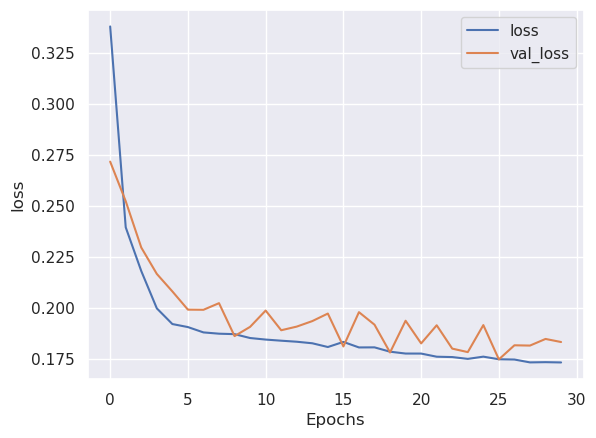

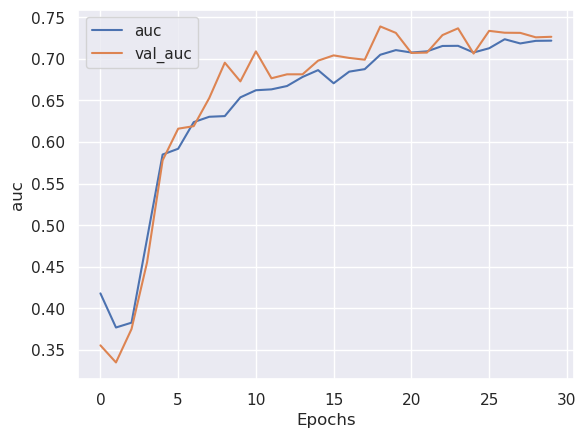

In [23]:
#showing the loss and val_los from the training data
plot_graphs(history, "loss")
#showing accuracy and val_accuracy from the training data 
plot_graphs(history, "auc")

In [24]:
#testing model
y_pred = model.predict(
    gen_batch(test, batch_size=16, shuffle=False)
)
y_pred = np.reshape(y_pred, -1)

771/771 [==============================] - 4s 5ms/step


In [25]:
len(y_pred)

12326

In [26]:
#save the results
import pandas as pd 
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
submission.to_csv('sample_submission_walkthrough1.csv')

### Observation
My model got a score of 0.7264 in private

My model got a score of 0.7438 on kaggle

After performing the model we realize that the model perform well there is no overfitting or underfitting, but i want to challege my self to get a better accuracy


**Plan**

I will change my hyperparameters to use :

**Gated Graph Neural Networks**
A typical example of recurrent-based graph filters is the Gated Graph Neural Networks (GGNN)-filter. The biggest modification from typical GNNs to GGNNs is the use of Gated Recurrent Units (GRU). The GGNN-filter also takes the edge type and edge direction into consideration.

# Trial 2 😎 

Gated Graph Neural Networks (GGNNs) are a type of neural network that can be used to learn from graph-structured data. Graph-structured data is data that is represented as a graph, where each node in the graph represents an entity and each edge in the graph represents a relationship between two entities.

#### Model Hyperparameters

GNN.get_default_hyperparameters()). These hyperparameters configure the exact stack of GNN layers:

"num_layers" sets the number of GNN message passing layers (usually, a number between 2 and 16)

"message_calculation_class" configures the message passing style. This chooses the tf2_gnn.layers.message_passing.* layer used in each step.

params["hidden_dim"] = 64

params["message_calculation_class"] = 'GGNN'

params["num_aggr_MLP_HIDDEN_LAYERS"] = 32

params['num_heads']=4 : to choose the number of heads


node_features= embedded

the first input contains a vector of the words after we change it by using the function Embedding
adjacency_lists=(edge)

the edges are what conects one nodes , their dimention is an arry of two values .
node_to_graph_map=node2graph
shows how max_nodes_len,number of edges on one batch
num_graphs=num_graph

number of samples
Epochs : indicates the number of passes of the entire training dataset the machine learning algorithm has completed

batch_size: the number of training examples in one forward/backward pass.
hidden_dim : sets the size of the output of all message passing layers.


In [27]:
import tensorflow as tf
from tensorflow.math import segment_mean
from tensorflow import keras
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Embedding, Dense
from tensorflow.keras.optimizers import Adam
# the first dim is different to the previous one. it is the total number of edges in this batch
data = keras.Input(batch_shape=(None,))
#Input layer for edge 
#Input layer for node2graph ids
#embedding layer over data with each token embedded as  size vector
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32)
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32)
embeded = Embedding(tokenizer.num_words, 20)(data)

# number of graphs (number of samples)
num_graph = tf.reduce_max(node2graph)+1
#gnn_input layer with inputs
gnn_input = GNNInput(
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)


params = GNN.get_default_hyperparameters()
params["hidden_dim"] = 64
params["num_aggr_MLP_HIDDEN_LAYERS"] = 32
params['message_calculation_class']= 'GGNN'
params['num_heads']= 4
gnn_layer = GNN(params)

gnn_out = gnn_layer(gnn_input)

print('gnn_out', gnn_out)

# https://www.tensorflow.org/api_docs/python/tf/math/segment_mean
avg = segment_mean(
    data=gnn_out,
    segment_ids=node2graph
)
print('mean:', avg)
#final layer is dense an its activation function is sigmoid
pred = Dense(1, activation='sigmoid')(avg)
print('pred:', pred)

model = Model(
    inputs={
        'data': data,
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred
)
model.summary()#display model's summary

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 64), dtype=tf.float32, name=None), name='gnn_1/StatefulPartitionedCall:0', description="created by layer 'gnn_1'")

mean: KerasTensor(type_spec=TensorSpec(shape=(None, 64), dtype=tf.float32, name=None), name='tf.math.segment_mean_1/SegmentMean:0', description="created by layer 'tf.math.segment_mean_1'")

pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_1/Sigmoid:0', description="created by layer 'dense_1'")

Model: "model_1"

__________________________________________________________________________________________________

 Layer (type)                   Output Shape         Param #     Connected to                     


 input_6 (InputLayer)           [(None,)]            0           []                               

                                                                                                  

 input_4 (InputLayer)           [(None,)]            0           [

In [28]:
#compile the model
model.compile(
    loss='BinaryCrossentropy',
    metrics=['AUC']
)

In [29]:
#fitting the model
#importing math library

import math

batch_size = 50
num_batchs = math.ceil(len(training_data) / batch_size)
num_batchs_validation = math.ceil(len(validation_set) / batch_size)

history = model.fit(
    gen_batch(
        training_data, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=30,
    validation_data=gen_batch(
        validation_set, batch_size=50, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/30

426/426 [==============================] - 14s 21ms/step - loss: 0.2036 - auc: 0.5742 - val_loss: 0.2009 - val_auc: 0.6474

Epoch 2/30

426/426 [==============================] - 8s 18ms/step - loss: 0.1862 - auc: 0.6352 - val_loss: 0.1995 - val_auc: 0.6796

Epoch 3/30

426/426 [==============================] - 8s 19ms/step - loss: 0.1836 - auc: 0.6609 - val_loss: 0.1957 - val_auc: 0.7045

Epoch 4/30

426/426 [==============================] - 8s 18ms/step - loss: 0.1832 - auc: 0.6625 - val_loss: 0.1995 - val_auc: 0.6766

Epoch 5/30

426/426 [==============================] - 7s 17ms/step - loss: 0.1827 - auc: 0.6667 - val_loss: 0.1842 - val_auc: 0.7304

Epoch 6/30

426/426 [==============================] - 8s 18ms/step - loss: 0.1819 - auc: 0.6762 - val_loss: 0.1853 - val_auc: 0.7236

Epoch 7/30

426/426 [==============================] - 8s 19ms/step - loss: 0.1803 - auc: 0.6831 - val_loss: 0.1867 - val_auc: 0.7388

Epoch 8/30

426/426 [==============================] -

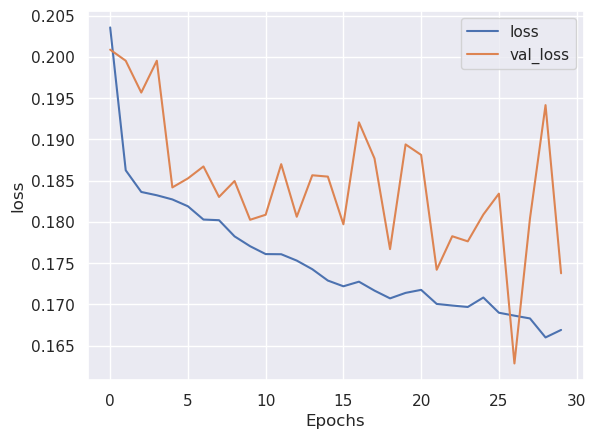

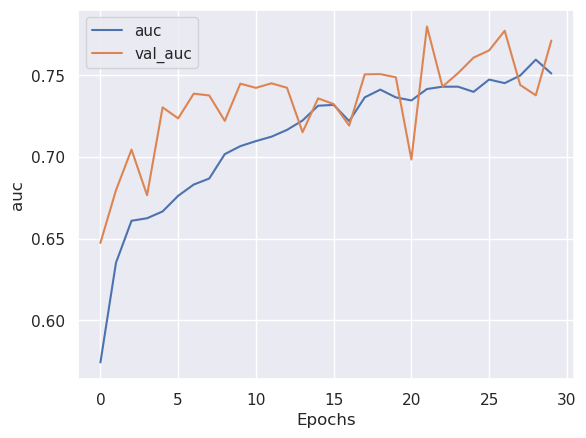

In [30]:
#showing the loss and val_los from the training data
plot_graphs(history, "loss")
#showing accuracy and val_accuracy from the training data 
plot_graphs(history, "auc")
     

In [31]:
#testing
y_pred = model.predict(
    gen_batch(test, batch_size=16, shuffle=False)
)
y_pred = np.reshape(y_pred, -1)

771/771 [==============================] - 4s 5ms/step


In [32]:
#generating submission file
import pandas as pd 
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
submission.to_csv('sample_submission_walkthrough2.csv')

###  Observation
My model got a score of 0.7713 in private

My model got a score of 0.76642 on kaggle

After performing the model we realize that the model perform well there is no overfitting or underfitting, Also it gives a better accuracy as i was expecting but i want to challege my self to get a better accuracy


GGNNs are better than GNNs because they can capture long-range dependencies in graphs. GNNs can only capture short-range dependencies, which can be a problem for graphs with a lot of long-range dependencies. GGNNs can overcome this limitation by using a message passing mechanism to propagate information through the graph. This allows GGNNs to learn more complex relationships between nodes in a graph, which can lead to better performance on tasks such as node classification and link prediction.

# Trial 3 😎 
**Relational Graph Convolutional Networks (RGCNs)** are a type of graph neural network that can be used to learn from graphs with multiple relation types. Graphs with multiple relation types are common in many real-world domains, such as social networks, knowledge graphs, and citation networks.RGCNs are made up of a series of layers, where each layer performs a different operation on the graph data. The first layer of an RGCN typically performs a message passing operation, where each node in the graph sends a message to its neighbors. The messages are then aggregated at each node, and the aggregated messages are used to update the node's state.The next layer of an RGCN typically performs a recurrent operation, where the node's state from the previous layer is used to update the node's state in the current layer. This process is repeated for a number of layers, and the final state of each node is used to make a prediction.RGCNs have been shown to be effective for a variety of tasks, including node classification, link prediction, and graph classification. They are a powerful tool for learning from graphs with multiple relation types, and they have the potential to be used for a wide variety of applications.


**Model Hyperparameters**



GNN.get_default_hyperparameters()). These hyperparameters configure the exact stack of GNN layers:

"num_layers" sets the number of GNN message passing layers (usually, a number between 2 and 16)

"message_calculation_class" configures the message passing style. This chooses the tf2_gnn.layers.message_passing.* layer used in each step.

params["num_aggr_MLP_HIDDEN_LAYERS"]=32 : this is a new hyperparameter used with this layer

params['message_calculation_class']= 'RGCN' : to chose the new methon.



node_features= embeded

the first input contains a vector of the words after we change it by using the function Embedding

adjacency_lists=(edge)

the edges are what conects one nodes , their dimention is an arry of two values .

node_to_graph_map=node2graph

shows how max_nodes_len,number of edges on one batch

num_graphs=num_graph

number of samples
Epochs : indicates the number of passes of the entire training dataset the machine learning algorithm has completed

batch_size: the number of training examples in one forward/backward pass.

hidden_dim= 64 : sets the size of the output of all message passing layers.

In [33]:
import tensorflow as tf
from tensorflow.math import segment_mean
from tensorflow import keras
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Embedding, Dense
from tensorflow.keras.optimizers import Adam

data = keras.Input(batch_shape=(None,))
# the first dim is different to the previous one. it is the total number of edges in this batch
#Input layer for edge 
#Input layer for node2graph ids
#embedding layer over data with each token embedded as  size vector
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32)
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32)
embeded = Embedding(tokenizer.num_words, 20)(data)

# number of graphs (number of samples)
num_graph = tf.reduce_max(node2graph)+1

gnn_input = GNNInput( #gnn_input layer with inputs
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)


params = GNN.get_default_hyperparameters()
params["hidden_dim"] = 64
params["num_aggr_MLP_HIDDEN_LAYERS"] = 32
params['message_calculation_class']= 'RGCN'
gnn_layer = GNN(params)

gnn_out = gnn_layer(gnn_input)

print('gnn_out', gnn_out)

# https://www.tensorflow.org/api_docs/python/tf/math/segment_mean
avg = segment_mean(
    data=gnn_out,
    segment_ids=node2graph
)
print('mean:', avg)
#final layer is dense an its activation function is sigmoid
pred = Dense(1, activation='sigmoid')(avg)
print('pred:', pred)

model = Model(
    inputs={
        'data': data,
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred
)
model.summary()#display model's summary

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 64), dtype=tf.float32, name=None), name='gnn_2/StatefulPartitionedCall:0', description="created by layer 'gnn_2'")

mean: KerasTensor(type_spec=TensorSpec(shape=(None, 64), dtype=tf.float32, name=None), name='tf.math.segment_mean_2/SegmentMean:0', description="created by layer 'tf.math.segment_mean_2'")

pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_2/Sigmoid:0', description="created by layer 'dense_2'")

Model: "model_2"

__________________________________________________________________________________________________

 Layer (type)                   Output Shape         Param #     Connected to                     


 input_9 (InputLayer)           [(None,)]            0           []                               

                                                                                                  

 input_7 (InputLayer)           [(None,)]            0           [

In [34]:
#comile the model
model.compile(
    loss='BinaryCrossentropy',
    metrics=['AUC']
)

In [35]:
#fitting the model
#importing math library
import math

batch_size = 50
num_batchs = math.ceil(len(training_data) / batch_size)
num_batchs_validation = math.ceil(len(validation_set) / batch_size)

history = model.fit(
    gen_batch(
        training_data, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=30,
    validation_data=gen_batch(
        validation_set, batch_size=50, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/30

426/426 [==============================] - 11s 16ms/step - loss: 0.2638 - auc: 0.4915 - val_loss: 0.2088 - val_auc: 0.6110

Epoch 2/30

426/426 [==============================] - 6s 14ms/step - loss: 0.1939 - auc: 0.6140 - val_loss: 0.2042 - val_auc: 0.6462

Epoch 3/30

426/426 [==============================] - 6s 14ms/step - loss: 0.1894 - auc: 0.6487 - val_loss: 0.1947 - val_auc: 0.6826

Epoch 4/30

426/426 [==============================] - 6s 14ms/step - loss: 0.1862 - auc: 0.6690 - val_loss: 0.1964 - val_auc: 0.6750

Epoch 5/30

426/426 [==============================] - 7s 15ms/step - loss: 0.1830 - auc: 0.6841 - val_loss: 0.1915 - val_auc: 0.7042

Epoch 6/30

426/426 [==============================] - 6s 14ms/step - loss: 0.1819 - auc: 0.6928 - val_loss: 0.2005 - val_auc: 0.7105

Epoch 7/30

426/426 [==============================] - 6s 15ms/step - loss: 0.1808 - auc: 0.6938 - val_loss: 0.1953 - val_auc: 0.6971

Epoch 8/30

426/426 [==============================] -

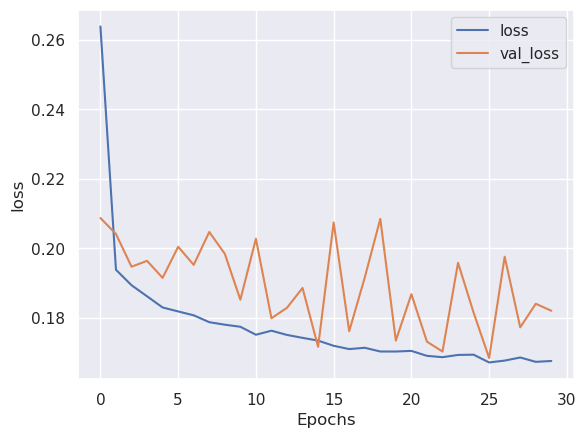

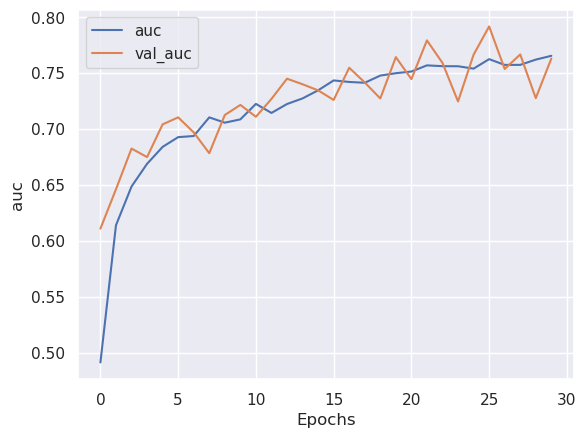

In [36]:
#showing the loss and val_los from the training data
plot_graphs(history, "loss")
#showing accuracy and val_accuracy from the training data 
plot_graphs(history, "auc")

In [37]:
#testing model
y_pred = model.predict(
    gen_batch(test, batch_size=16, shuffle=False)
)
y_pred = np.reshape(y_pred, -1)

771/771 [==============================] - 4s 4ms/step


In [38]:
#generating submission file
import pandas as pd 
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
submission.to_csv('sample_submission_walkthrough3.csv')

## Observation
My model got a score of  0.7630 in private

My model got a score of 0.767 on kaggle

After performing the model we realize that the model perform well there is no overfitting or underfitting, Also it gives a better accuracy as i was expecting but i want to challege my self to get a better accuracy

There are several reasons why **RGCNs may be better than GGNNs** in some cases. First, RGCNs are more efficient to train. This is because they do not need to store the entire graph state at each step of training, as GGNNs do. Second, RGCNs are more expressive. This is because they can learn more complex relationships between nodes, as they are not limited to the relationships that are present in the graph at the current time step. Third, RGCNs are more robust to noise. This is because they are not as sensitive to small changes in the graph structure, as GGNNs are.
In general, RGCNs are a good choice for tasks where efficiency and expressiveness are important, such as node classification and link prediction. GGNNs are a good choice for tasks where robustness to noise and the ability to model dynamic graphs are important, such as natural language processing and computer vision.

# Trial 4 😎 
**Relational Graph Attention Networks (R-GATs)** are a type of neural network that can be used to learn representations of entities in a graph. R-GATs extend Graph Attention Networks (GATs) by incorporating relational information into the attention mechanism. This allows R-GATs to better capture the complex relationships between entities in a graph.R-GATs are composed of two main components: an attention mechanism and a message passing mechanism. The attention mechanism is responsible for learning the importance of each neighbor of an entity. The message passing mechanism is responsible for aggregating the information from the neighbors of an entity.The attention mechanism in R-GATs is a weighted sum of the features of each neighbor of an entity. The weights are learned by a neural network that takes the features of the entity and its neighbors as input. The message passing mechanism is a simple average of the features of the neighbors of an entity.R-GATs have been shown to be effective for a variety of tasks on graphs, including node classification, link prediction, and graph classification. They have been shown to outperform other graph neural networks on these tasks, especially when the graph is large and complex.

**Model Hyperparameters**


GNN.get_default_hyperparameters()). These hyperparameters configure the exact stack of GNN layers:

"num_layers" sets the number of GNN message passing layers (usually, a number between 2 and 16)

"message_calculation_class" configures the message passing style. This chooses the tf2_gnn.layers.message_passing.* layer used in each step.

params["num_aggr_MLP_HIDDEN_LAYERS"]=32 : this is a new hyperparameter used with this layer

params['message_calculation_class']= 'RGAT' : to chose the new methon.


node_features= embedded

the first input contains a vector of the words after we change it by using the function Embedding
adjacency_lists=(edge)

the edges are what conects one nodes , their dimention is an arry of two values .
node_to_graph_map=node2graph
shows how max_nodes_len,number of edges on one batch
num_graphs=num_graph

number of samples
Epochs : indicates the number of passes of the entire training dataset the machine learning algorithm has completed

batch_size: the number of training examples in one forward/backward pass.
hidden_dim= 64 : sets the size of the output of all message passing layers.


In [39]:

import tensorflow as tf
from tensorflow.math import segment_mean
from tensorflow import keras
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Embedding, Dense
from tensorflow.keras.optimizers import Adam

data = keras.Input(batch_shape=(None,))
# the first dim is different to the previous one. it is the total number of edges in this batch
#Input layer for edge 
#Input layer for node2graph ids
#embedding layer over data with each token embedded as  size vector
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32)
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32)
embeded = Embedding(tokenizer.num_words, 20)(data)

# number of graphs (number of samples)
num_graph = tf.reduce_max(node2graph)+1

gnn_input = GNNInput( #gnn_input layer with inputs
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)


params = GNN.get_default_hyperparameters()
params["hidden_dim"] = 64
params["num_aggr_MLP_HIDDEN_LAYERS"] = 32
params['message_calculation_class']= 'RGAT'
params['num_heads']= 4
gnn_layer = GNN(params)

gnn_out = gnn_layer(gnn_input)

print('gnn_out', gnn_out)

# https://www.tensorflow.org/api_docs/python/tf/math/segment_mean
avg = segment_mean(
    data=gnn_out,
    segment_ids=node2graph
)
print('mean:', avg)
#final layer is dense an its activation function is sigmoid
pred = Dense(1, activation='sigmoid')(avg)
print('pred:', pred)

model = Model(
    inputs={
        'data': data,
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred
)
model.summary()#display model's summary

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 64), dtype=tf.float32, name=None), name='gnn_3/StatefulPartitionedCall:0', description="created by layer 'gnn_3'")

mean: KerasTensor(type_spec=TensorSpec(shape=(None, 64), dtype=tf.float32, name=None), name='tf.math.segment_mean_3/SegmentMean:0', description="created by layer 'tf.math.segment_mean_3'")

pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_3/Sigmoid:0', description="created by layer 'dense_3'")

Model: "model_3"

__________________________________________________________________________________________________

 Layer (type)                   Output Shape         Param #     Connected to                     


 input_12 (InputLayer)          [(None,)]            0           []                               

                                                                                                  

 input_10 (InputLayer)          [(None,)]            0           [

In [40]:
#compile the model
model.compile(
    loss='BinaryCrossentropy',
    metrics=['AUC']
)

In [41]:
#fitting the model
#importing math library
import math

batch_size = 50
num_batchs = math.ceil(len(training_data) / batch_size)
num_batchs_validation = math.ceil(len(validation_set) / batch_size)

history = model.fit(
    gen_batch(
        training_data, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=30,
    validation_data=gen_batch(
        validation_set, batch_size=50, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/30

426/426 [==============================] - 18s 29ms/step - loss: 0.2681 - auc: 0.4937 - val_loss: 0.1948 - val_auc: 0.6747

Epoch 2/30

426/426 [==============================] - 11s 27ms/step - loss: 0.1930 - auc: 0.6218 - val_loss: 0.2301 - val_auc: 0.6875

Epoch 3/30

426/426 [==============================] - 11s 25ms/step - loss: 0.1876 - auc: 0.6617 - val_loss: 0.2006 - val_auc: 0.7097

Epoch 4/30

426/426 [==============================] - 11s 26ms/step - loss: 0.1846 - auc: 0.6822 - val_loss: 0.2066 - val_auc: 0.6813

Epoch 5/30

426/426 [==============================] - 11s 26ms/step - loss: 0.1832 - auc: 0.6849 - val_loss: 0.1868 - val_auc: 0.7123

Epoch 6/30

426/426 [==============================] - 11s 26ms/step - loss: 0.1808 - auc: 0.6969 - val_loss: 0.1887 - val_auc: 0.7133

Epoch 7/30

426/426 [==============================] - 11s 25ms/step - loss: 0.1803 - auc: 0.6950 - val_loss: 0.1867 - val_auc: 0.6955

Epoch 8/30

426/426 [===========================

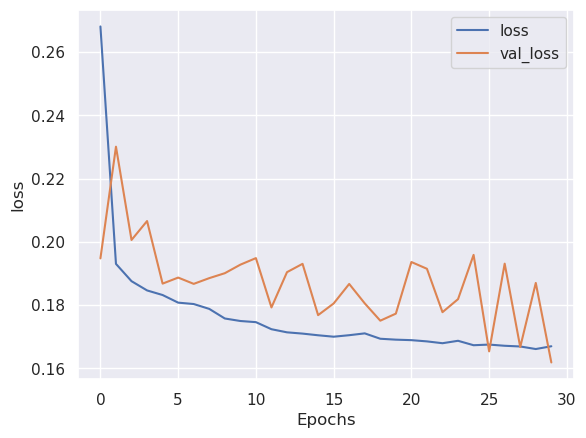

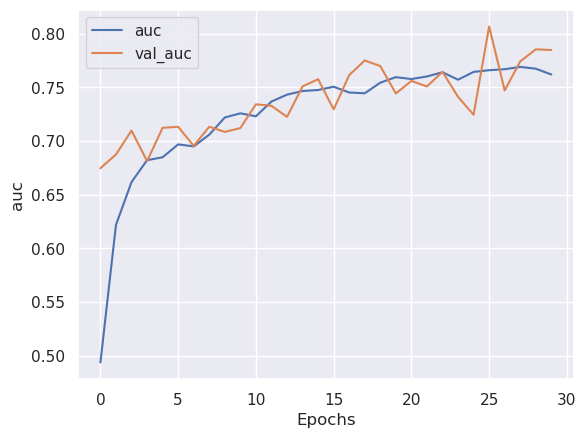

In [42]:
#showing the loss and val_los from the training data
plot_graphs(history, "loss")
#showing accuracy and val_accuracy from the training data 
plot_graphs(history, "auc")

In [43]:
#testing model
y_pred = model.predict(
    gen_batch(test, batch_size=16, shuffle=False)
)
y_pred = np.reshape(y_pred, -1)

771/771 [==============================] - 5s 6ms/step


In [44]:
#generating submission file
import pandas as pd 
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
submission.to_csv('sample_submission_walkthrough4.csv')

## Observation
My model got a score of 0.7848 in private

My model got a score of 0.78219 on kaggle

After performing the model we realize that the model perform well, Also it gives a better accuracy as i was expecting but i want to challege my self to get a better accuracy

It gives a beter accuracy because of

**Attention Mechanisms:** RGATs employ attention mechanisms, which allow the model to dynamically weigh the importance of different nodes and edges when aggregating information across the graph. This can be particularly useful when dealing with large, complex graphs where not all nodes and edges are equally relevant to the task at hand. RGCNs, on the other hand, use fixed, pre-defined convolutional filters that do not allow for this kind of dynamic weighting.

**Scalability:** RGATs can be more scalable than RGCNs, particularly when dealing with dense graphs. This is because the attention mechanism in RGATs allows the model to selectively focus on the most important edges and nodes, whereas RGCNs must process all edges and nodes in the graph, which can become computationally expensive for large, dense graphs.

# Trial_5 😎 
**Relational Graph Isomorphism Networks (RGINs)** are a type of graph neural network that can be used to learn representations of entities in a graph. RGINs extend Graph Isomorphism Networks (GINs) by incorporating relational information into the attention mechanism. This allows RGINs to better capture the complex relationships between entities in a graph.RGINs are composed of two main components: an attention mechanism and a message passing mechanism. The attention mechanism is responsible for learning the importance of each neighbor of an entity. The message passing mechanism is responsible for aggregating the information from the neighbors of an entity.The attention mechanism in RGINs is a weighted sum of the features of each neighbor of an entity. The weights are learned by a neural network that takes the features of the entity and its neighbors as input. The message passing mechanism is a simple average of the features of the neighbors of an entity.

#### Model Hyperparameters



GNN.get_default_hyperparameters()). These hyperparameters configure the exact stack of GNN layers:

"num_layers" sets the number of GNN message passing layers (usually, a number between 2 and 16)

"message_calculation_class" configures the message passing style. This chooses the tf2_gnn.layers.message_passing.* layer used in each step.

params["num_aggr_MLP_HIDDEN_LAYERS"]=32 : this is a new hyperparameter used witht thie layer

params['message_calculation_class']= 'RGIN' : to chose the new methon.



node_features= embedded

the first input contains a vector of the words after we change it by using the function Embadding
adjacency_lists=(edge)

the edges are what conects one nodes , their dimention is an arry of two values .
node_to_graph_map=node2graph

shows how max_nodes_len,number of edges on one batch

num_graphs=num_graph

number of samples

**Epochs** : indicates the number of passes of the entire training dataset the machine learning algorithm has completed

**batch_size**: the number of training examples in one forward/backward pass.

**hidden_dim**= 64 : sets the size of the output of all message passing layers.

In [23]:
import tensorflow as tf
from tensorflow.math import segment_mean
from tensorflow import keras
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Embedding, Dense
from tensorflow.keras.optimizers import Adam
data = keras.Input(batch_shape=(None,))

# the first dim is different to the previous one. it is the total number of edges in this batch
#Input layer for edge 
#Input layer for node2graph ids
#embedding layer over data with each token embedded as  size vector
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32)
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32)
embeded = Embedding(tokenizer.num_words, 20)(data)

# number of graphs (number of samples)
num_graph = tf.reduce_max(node2graph)+1

# declare the GNNInput that take the features of node, the edge, the created list 'node2graph', and number of graphs (number of samples)
gnn_input = GNNInput( 
    node_features = embeded,
    adjacency_lists = (edge,),
    node_to_graph_map = node2graph, 
    num_graphs = num_graph,
)


# configure the hyperparameters of GNN layers
# https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py
# 
# frist load the defualt hyperparameters
params = GNN.get_default_hyperparameters()
# sets the size of the output of all message passing layers
params["hidden_dim"] = 32
# configures the message passing style to be RGIN (Relational Graph Isomorphism Networks)
params['message_calculation_class'] = 'RGIN'
params['num_aggr_MLP_hidden_layers'] = 2

# Implements a deep Graph Neural Network
gnn_layer = GNN(params)
gnn_out = gnn_layer(gnn_input)



# Computes the mean along segments of a tensor
# https://www.tensorflow.org/api_docs/python/tf/math/segment_mean
avg = segment_mean(
    data = gnn_out,
    segment_ids = node2graph
)

# Define the out put layer of the model
pred = Dense(1, activation='sigmoid')(avg)


# Creating the model
model = Model(
    inputs = {
        'data': data,
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs = pred
)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 tf.math.reduce_max_1 (TFOpLamb  ()                  0           ['input_6[0][0]']                
 da)                                                                                              
                                                                                                  
 embedding_1 (Embedding)        (None, 20)           10000       ['input_4[0][0]']          

In [24]:
model.compile(
    loss='BinaryCrossentropy',
    metrics=['AUC']
)

In [29]:
#fitting the model
#importing math library
import math

batch_size = 30
num_batchs = math.ceil(len(training_data) / batch_size)
num_batchs_validation = math.ceil(len(validation_set) / batch_size)

history = model.fit(
    gen_batch(
        training_data, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=30,
    validation_data=gen_batch(
        validation_set, batch_size=30, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/30
709/709 [==============================] - 18s 18ms/step - loss: 0.2377 - auc: 0.5285 - val_loss: 0.1845 - val_auc: 0.6161
Epoch 2/30
709/709 [==============================] - 12s 17ms/step - loss: 0.1983 - auc: 0.6318 - val_loss: 0.1843 - val_auc: 0.6429
Epoch 3/30
709/709 [==============================] - 11s 15ms/step - loss: 0.1938 - auc: 0.6524 - val_loss: 0.1742 - val_auc: 0.6655
Epoch 4/30
709/709 [==============================] - 12s 17ms/step - loss: 0.1909 - auc: 0.6597 - val_loss: 0.1751 - val_auc: 0.6901
Epoch 5/30
709/709 [==============================] - 11s 16ms/step - loss: 0.1878 - auc: 0.6741 - val_loss: 0.1745 - val_auc: 0.6723
Epoch 6/30
709/709 [==============================] - 11s 16ms/step - loss: 0.1855 - auc: 0.6863 - val_loss: 0.1699 - val_auc: 0.7164
Epoch 7/30
709/709 [==============================] - 12s 16ms/step - loss: 0.1837 - auc: 0.6945 - val_loss: 0.1777 - val_auc: 0.6797
Epoch 8/30
709/709 [==============================] - 12s 16ms

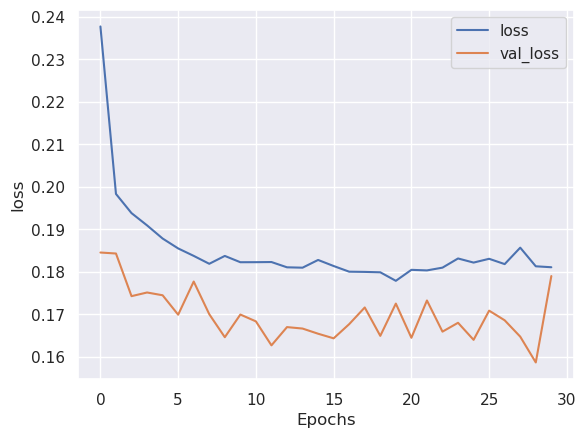

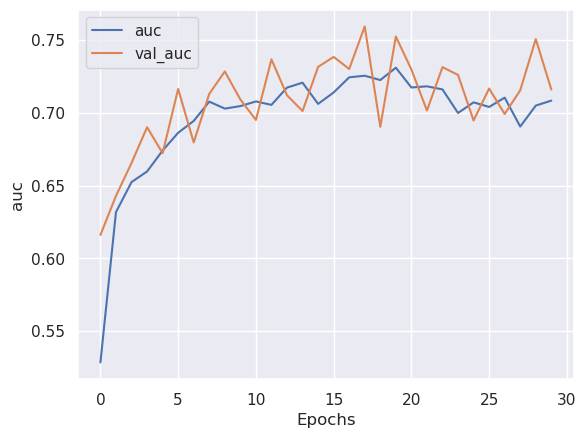

In [30]:
#showing the loss and val_los from the training data
plot_graphs(history, "loss")
#showing accuracy and val_accuracy from the training data 
plot_graphs(history, "auc")

In [31]:
#testing model
y_pred = model.predict(
    gen_batch(test, batch_size=16, shuffle=False)
)
y_pred = np.reshape(y_pred, -1)

771/771 [==============================] - 4s 5ms/step


In [32]:
#generating submission file
import pandas as pd 
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
submission.to_csv('sample_submission_walkthrough5.csv')

## Observation
My model got a score of 0.7160 in private

My model got a score of 0.74 in kaggle

The accuracy decreased!!

# upsampling 🧐 👻 

Upsampling is the process of randomly duplicating observations from the

minority class to reinforce its signal.

First, we will import the resampling module from Scikit-Learn:

Module for resampling Python

1- From sklearn.utils import resample

Next, we will create a new Data Frame with an up-sampled minority class.

Here are the steps:

1- First, we will separate observations from each class into different Data Frames.

2- Next, we will resample the minority class with replacement, setting the number of samples to match that of the majority class.

3- Finally, we'll combine the up-sampled minority class Data Frame with the original majority class Data Frame.

### Here we have unbalanced data.

So we need to up sample positive class.

In [20]:
#Reading traing data 
training_data= read_sdf('/kaggle/input/dataset/train.sdf')

  0%|          | 0/25024 [00:00<?, ?it/s]

In [21]:
import pandas as pd

df_train=pd.DataFrame(training_data,columns=["nodes","edge","label"])
df_train

,nodes,edge,label
0,"[S, O, O, O, O, N, N, N, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C]","[[0, 8], [0, 14], [1, 10], [2, 11], [3, 7], [4, 7], [5, 9], [5, 14], [6, 14], [6, 17], [7, 22], ...",0
1,"[O, O, O, O, O, O, N, N, N, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C]","[[0, 6], [0, 15], [1, 15], [2, 7], [3, 8], [4, 7], [5, 8], [6, 9], [7, 16], [8, 17], [9, 10], [9...",0
2,"[F, F, F, O, O, O, O, O, N, N, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C,...","[[0, 19], [1, 19], [2, 19], [3, 16], [4, 28], [4, 32], [5, 28], [6, 29], [6, 33], [7, 29], [8, 1...",0
3,"[Cl, S, S, O, O, O, O, N, N, N, N, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C]","[[0, 12], [1, 15], [1, 18], [2, 4], [2, 5], [2, 6], [2, 23], [3, 13], [7, 11], [7, 13], [7, 15],...",0
4,"[S, O, O, N, N, N, N, N, N, C, C, C, C, C, C, C, C, C, C, C]","[[0, 1], [0, 2], [0, 5], [0, 9], [3, 4], [3, 10], [4, 16], [6, 13], [6, 18], [7, 17], [7, 19], [...",0
...,...,...,...
25019,"[O, O, O, O, O, O, N, N, C, C, C, C, C, C, C, C, C, C, C, C, C, C]","[[0, 8], [0, 14], [1, 10], [2, 12], [3, 13], [4, 7], [5, 7], [6, 8], [6, 9], [6, 15], [7, 18], [...",0
25020,"[O, O, O, O, O, N, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C]","[[0, 9], [1, 11], [2, 16], [2, 19], [3, 16], [4, 15], [5, 18], [6, 7], [6, 8], [6, 13], [7, 10],...",0
25021,"[O, O, O, O, O, O, O, O, O, N, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C,...","[[0, 12], [0, 16], [1, 10], [2, 11], [3, 15], [4, 16], [5, 17], [6, 18], [6, 27], [7, 20], [8, 2...",0
25022,"[S, O, O, O, O, N, N, N, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C]","[[0, 11], [0, 12], [1, 21], [1, 27], [2, 22], [2, 28], [3, 21], [4, 22], [5, 8], [5, 12], [6, 13...",0


In [22]:
#upsampling the label data 
df_class0 = df_train[df_train["label"]==0]
df_class1 = df_train[df_train["label"]==1]

print(df_class0.shape)
print(df_class1.shape)

(23806, 3)
(1218, 3)


In [23]:
from sklearn.utils import resample
df_class1_upsample = resample(df_class1, replace=True, n_samples=len(df_class0), random_state=42)
print(df_class1_upsample)

                                                                                                     nodes  \
23357              [O, O, O, O, O, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C]   
17640  [O, O, O, O, O, O, O, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C,...   
23463                                               [O, O, N, N, C, C, C, C, C, C, C, C, C, C, C, C, C, C]   
22676                       [O, O, O, O, O, O, O, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C]   
21324                 [S, S, O, O, O, O, N, N, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C]   
...                                                                                                    ...   
16643              [O, O, O, O, O, O, N, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C]   
5670   [Cl, O, O, O, O, O, O, O, O, N, N, N, N, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, C...   
4221   [Cl

In [24]:
df_upsample =pd.concat([df_class0,df_class1_upsample])
print(df_upsample["label"].value_counts())

0    23806
1    23806
Name: label, dtype: int64


In [25]:
df_upsampling = df_upsample.to_numpy()
     

In [26]:
#splitting traing data 
training_data, validation_set = train_test_split(df_upsampling, test_size=0.15,)

# tokenization ❤️‍🔥 

In [27]:
from tensorflow.keras.preprocessing.text import Tokenizer

max_vocab = 500
max_len = 100


# build vocabulary from training set
all_nodes = [s[0] for s in training_data]
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(all_nodes)

# Trial_6 👩‍💻 🚀 😎
### RGAT 
I used Graph Neural Network as this task is a bioassay task for anticancer activity prediction, where each chemical compound is represented as a graph.

I used this Graph Neural Network with the Up-Sampled data, in addition to applying one of the GCN aggregation mechanisms by tuning the message_passing mechanisms and configure the message passing style to be RGAT

After declaring the GNNInput, I defined the hyperparameters for GNN layer by loading the defualt hyperparameters of GNN and set hidden_dim to be 64 which represent the size of the output of all message passing layers, and set message_calculation_class parameter to be RGAT, and set the number of parallel (independent) weighted sums that are computed num_heads to be 4

then adding Graph Neural Network layer with the defined hyperparameters and calculating segmented mean based on segment_ids

Finally, define the output layer of the model then building and compiling the model using BinaryCrossentropy for loss and the AUC metric to measure the performance of the network.


While fitting the model I specified the value of batch size to be 16 and the value of epochs to be 10 and used the validation_set to validate our model

In [59]:
import tensorflow as tf
from tensorflow.math import segment_mean
from tensorflow import keras
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Embedding, Dense
from tensorflow.keras.optimizers import Adam

data = keras.Input(batch_shape=(None,))
# the first dim is different to the previous one. it is the total number of edges in this batch
#Input layer for edge 
#Input layer for node2graph ids
#embedding layer over data with each token embedded as  size vector
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32)
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32)
embeded = Embedding(tokenizer.num_words, 20)(data)

# number of graphs (number of samples)
num_graph = tf.reduce_max(node2graph)+1
# declare the GNNInput that take the features of node, the edge, the created list 'node2graph', and number of graphs (number of samples)

gnn_input = GNNInput(
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)


params = GNN.get_default_hyperparameters()
params["hidden_dim"] = 64
params["num_aggr_MLP_HIDDEN_LAYERS"] = 32
params['message_calculation_class']= 'RGAT'
params['num_heads']= 4
gnn_layer = GNN(params)

gnn_out = gnn_layer(gnn_input)

print('gnn_out', gnn_out)

# https://www.tensorflow.org/api_docs/python/tf/math/segment_mean
avg = segment_mean(
    data=gnn_out,
    segment_ids=node2graph
)
print('mean:', avg)
#final layer is dense an its activation function is sigmoid
pred = Dense(1, activation='sigmoid')(avg)
print('pred:', pred)

model = Model(
    inputs={
        'data': data,
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred
)
model.summary() #display model's summary

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 64), dtype=tf.float32, name=None), name='gnn_5/StatefulPartitionedCall:0', description="created by layer 'gnn_5'")

mean: KerasTensor(type_spec=TensorSpec(shape=(None, 64), dtype=tf.float32, name=None), name='tf.math.segment_mean_5/SegmentMean:0', description="created by layer 'tf.math.segment_mean_5'")

pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_5/Sigmoid:0', description="created by layer 'dense_5'")

Model: "model_5"

__________________________________________________________________________________________________

 Layer (type)                   Output Shape         Param #     Connected to                     


 input_18 (InputLayer)          [(None,)]            0           []                               

                                                                                                  

 input_16 (InputLayer)          [(None,)]            0           [

In [60]:
#compile the model
model.compile(
    loss='BinaryCrossentropy',
    metrics=['AUC']
)

In [61]:
#fitting the model
#importing math library
import math

batch_size = 30
num_batchs = math.ceil(len(training_data) / batch_size)
num_batchs_validation = math.ceil(len(validation_set) / batch_size)

history = model.fit(
    gen_batch(
        training_data, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=30,
    validation_data=gen_batch(
        validation_set, batch_size=30, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/30

1349/1349 [==============================] - 41s 27ms/step - loss: 0.6472 - auc: 0.6696 - val_loss: 0.6087 - val_auc: 0.7304

Epoch 2/30

1349/1349 [==============================] - 34s 25ms/step - loss: 0.5931 - auc: 0.7474 - val_loss: 0.5639 - val_auc: 0.7810

Epoch 3/30

1349/1349 [==============================] - 35s 26ms/step - loss: 0.5591 - auc: 0.7858 - val_loss: 0.5479 - val_auc: 0.8018

Epoch 4/30

1349/1349 [==============================] - 35s 26ms/step - loss: 0.5379 - auc: 0.8056 - val_loss: 0.5259 - val_auc: 0.8200

Epoch 5/30

1349/1349 [==============================] - 35s 26ms/step - loss: 0.5152 - auc: 0.8254 - val_loss: 0.5075 - val_auc: 0.8395

Epoch 6/30

1349/1349 [==============================] - 34s 25ms/step - loss: 0.4983 - auc: 0.8383 - val_loss: 0.4795 - val_auc: 0.8522

Epoch 7/30

1349/1349 [==============================] - 35s 26ms/step - loss: 0.4799 - auc: 0.8521 - val_loss: 0.4622 - val_auc: 0.8642

Epoch 8/30

1349/1349 [===========

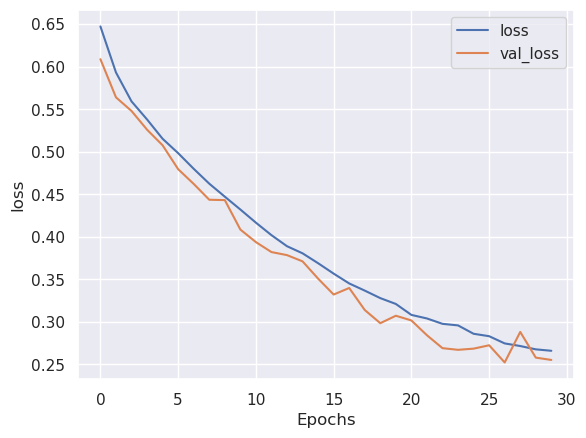

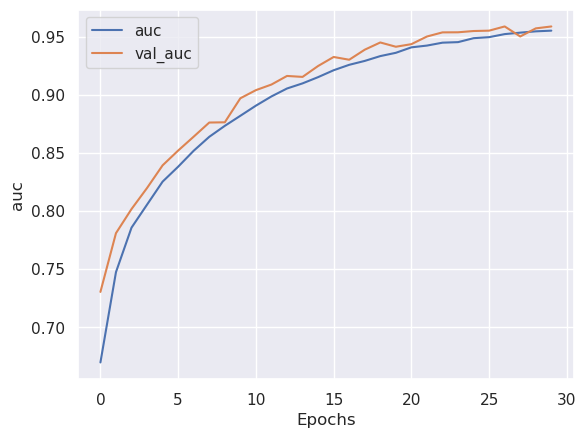

In [62]:
#showing the loss and val_los from the training data
plot_graphs(history, "loss")
#showing accuracy and val_accuracy from the training data 
plot_graphs(history, "auc")

In [63]:
#testing model
y_pred = model.predict(
    gen_batch(test, batch_size=16, shuffle=False)
)
y_pred = np.reshape(y_pred, -1)

771/771 [==============================] - 5s 6ms/step


In [64]:
#generating submission file
import pandas as pd 
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
submission.to_csv('sample_submission_walkthrough6.csv', index=False)

## Observation

My model got a score of 0.9592 in private

My model got a score of 0.84 in kaggle

**RGAT gives the Best ACCURACY**

The accuracy Increased compared to trial 4 !!

SO i was expecting that because i used upsampling

I want to increase the accuracy so i will use GGNN

# Trial 7  👩‍💻 
I used this Graph Neural Network with the Up-Sampled data, in addition to applying one of the GCN aggregation mechanisms by tuning the message_passing mechanisms and configure the message passing style to be GGNN

After declaring the GNNInput, I defined the hyperparameters for GNN layer by loading the defualt hyperparameters of GNN and set hidden_dim to be 64 which represent the size of the output of all message passing layers, and set message_calculation_class parameter to be GGNN

then adding Graph Neural Network layer with the defined hyperparameters and calculating segmented mean based on segment_ids

Finally, define the output layer of the model then building and compiling the model using BinaryCrossentropy for loss and the AUC metric to measure the performance of the network.


While fitting the model I specified the value of batch size to be 30 and the value of epochs to be 30 and used the validation_set to validate our model

In [65]:
import tensorflow as tf
from tensorflow.math import segment_mean
from tensorflow import keras
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Embedding, Dense
from tensorflow.keras.optimizers import Adam

data = keras.Input(batch_shape=(None,))
# the first dim is different to the previous one. it is the total number of edges in this batch
#Input layer for edge 
#Input layer for node2graph ids
#embedding layer over data with each token embedded as  size vector
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32)
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32)
embeded = Embedding(tokenizer.num_words, 20)(data)

# number of graphs (number of samples)
num_graph = tf.reduce_max(node2graph)+1
# declare the GNNInput that take the features of node, the edge, the created list 'node2graph', and number of graphs (number of samples)
gnn_input = GNNInput(
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)


params = GNN.get_default_hyperparameters()
params["hidden_dim"] = 64
params["num_aggr_MLP_HIDDEN_LAYERS"] = 32
params['message_calculation_class']= 'GGNN'
params['num_heads']= 4
gnn_layer = GNN(params)

gnn_out = gnn_layer(gnn_input)

print('gnn_out', gnn_out)

# https://www.tensorflow.org/api_docs/python/tf/math/segment_mean
avg = segment_mean(
    data=gnn_out,
    segment_ids=node2graph
)
print('mean:', avg)
#final layer is dense an its activation function is sigmoid

pred = Dense(1, activation='sigmoid')(avg)
print('pred:', pred)

model = Model(
    inputs={
        'data': data,
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred
)
model.summary()#display model's summary

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 64), dtype=tf.float32, name=None), name='gnn_6/StatefulPartitionedCall:0', description="created by layer 'gnn_6'")

mean: KerasTensor(type_spec=TensorSpec(shape=(None, 64), dtype=tf.float32, name=None), name='tf.math.segment_mean_6/SegmentMean:0', description="created by layer 'tf.math.segment_mean_6'")

pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_6/Sigmoid:0', description="created by layer 'dense_6'")

Model: "model_6"

__________________________________________________________________________________________________

 Layer (type)                   Output Shape         Param #     Connected to                     


 input_21 (InputLayer)          [(None,)]            0           []                               

                                                                                                  

 input_19 (InputLayer)          [(None,)]            0           [

In [66]:
#compile the model
model.compile(
    loss='BinaryCrossentropy',
    metrics=['AUC']
)

In [67]:
#fitting the model
#importing math library
import math

batch_size = 30
num_batchs = math.ceil(len(training_data) / batch_size)
num_batchs_validation = math.ceil(len(validation_set) / batch_size)

history = model.fit(
    gen_batch(
        training_data, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=30,
    validation_data=gen_batch(
        validation_set, batch_size=30, repeat=True
    ),
    validation_steps=num_batchs_validation,
)
     

Epoch 1/30

1349/1349 [==============================] - 28s 18ms/step - loss: 0.6415 - auc: 0.6749 - val_loss: 0.6111 - val_auc: 0.7185

Epoch 2/30

1349/1349 [==============================] - 24s 18ms/step - loss: 0.6009 - auc: 0.7338 - val_loss: 0.5828 - val_auc: 0.7653

Epoch 3/30

1349/1349 [==============================] - 23s 17ms/step - loss: 0.5750 - auc: 0.7642 - val_loss: 0.5548 - val_auc: 0.7925

Epoch 4/30

1349/1349 [==============================] - 22s 17ms/step - loss: 0.5303 - auc: 0.8114 - val_loss: 0.4929 - val_auc: 0.8487

Epoch 5/30

1349/1349 [==============================] - 23s 17ms/step - loss: 0.4747 - auc: 0.8551 - val_loss: 0.4492 - val_auc: 0.8779

Epoch 6/30

1349/1349 [==============================] - 23s 17ms/step - loss: 0.4334 - auc: 0.8814 - val_loss: 0.4000 - val_auc: 0.9043

Epoch 7/30

1349/1349 [==============================] - 23s 17ms/step - loss: 0.3964 - auc: 0.9021 - val_loss: 0.3817 - val_auc: 0.9114

Epoch 8/30

1349/1349 [===========

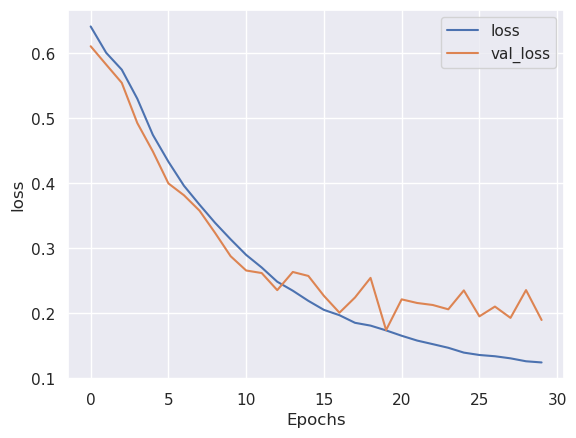

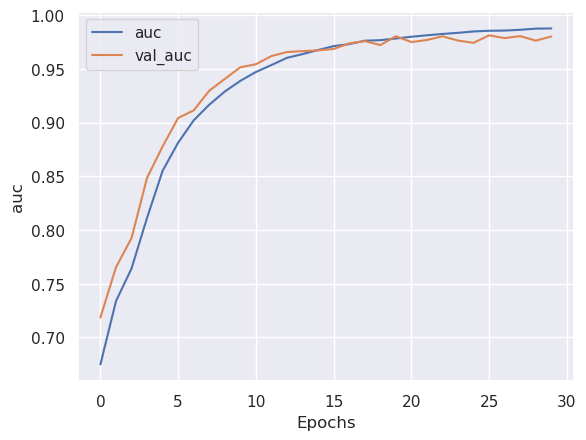

In [68]:
#showing the loss and val_los from the training data
plot_graphs(history, "loss")
#showing accuracy and val_accuracy from the training data 
plot_graphs(history, "auc")
     

In [69]:
#testing model
y_pred = model.predict(
    gen_batch(test, batch_size=16, shuffle=False)
)
y_pred = np.reshape(y_pred, -1)
     

771/771 [==============================] - 4s 5ms/step


In [70]:
#generating submission file
import pandas as pd 
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
submission.to_csv('sample_submission_walkthrough7.csv', index=False)

## Observation
My model got a score of 0.9802 in private

My model got a score of 0.8316 in kaggle

The accuracy decreased compared to RGAT in trial_6!!

BUT comparing with Trial 2 it gives better accuracy bec i used the upsampling in my preprocessing

# Trial_8  👩‍💻 

### I will use **RGCN**

I used this Graph Neural Network with the Up-Sampled data, in addition to applying one of the GCN aggregation mechanisms by tuning the message_passing mechanisms and configure the message passing style to be RGCN

After declaring the GNNInput, I defined the hyperparameters for GNN layer by loading the defualt hyperparameters of GNN and set hidden_dim to be 64 which represent the size of the output of all message passing layers, and set message_calculation_class parameter to be RGCN

then adding Graph Neural Network layer with the defined hyperparameters and calculating segmented mean based on segment_ids

Finally, define the output layer of the model then building and compiling the model using BinaryCrossentropy for loss and the AUC metric to measure the performance of the network.


While fitting the model I specified the value of batch size to be 50 and the value of epochs to be 30 and used the validation_set to validate our model



In [71]:
import tensorflow as tf
from tensorflow.math import segment_mean
from tensorflow import keras
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Embedding, Dense
from tensorflow.keras.optimizers import Adam

data = keras.Input(batch_shape=(None,))
# the first dim is different to the previous one. it is the total number of edges in this batch
#Input layer for edge 
#Input layer for node2graph ids
#embedding layer over data with each token embedded as  size vector
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32)
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32)
embeded = Embedding(tokenizer.num_words, 20)(data)

# number of graphs (number of samples)
num_graph = tf.reduce_max(node2graph)+1
# declare the GNNInput that take the features of node, the edge, the created list 'node2graph', and number of graphs (number of samples)
gnn_input = GNNInput(
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)


params = GNN.get_default_hyperparameters()
params["hidden_dim"] = 64
params["num_aggr_MLP_HIDDEN_LAYERS"] = 32
params['message_calculation_class']= 'RGCN'
gnn_layer = GNN(params)

gnn_out = gnn_layer(gnn_input)

print('gnn_out', gnn_out)

# https://www.tensorflow.org/api_docs/python/tf/math/segment_mean
avg = segment_mean(
    data=gnn_out,
    segment_ids=node2graph
)
print('mean:', avg)
#final layer is dense an its activation function is sigmoid
pred = Dense(1, activation='sigmoid')(avg)
print('pred:', pred)

model = Model(
    inputs={
        'data': data,
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred
)
model.summary()#display model's summary

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 64), dtype=tf.float32, name=None), name='gnn_7/StatefulPartitionedCall:0', description="created by layer 'gnn_7'")

mean: KerasTensor(type_spec=TensorSpec(shape=(None, 64), dtype=tf.float32, name=None), name='tf.math.segment_mean_7/SegmentMean:0', description="created by layer 'tf.math.segment_mean_7'")

pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_7/Sigmoid:0', description="created by layer 'dense_7'")

Model: "model_7"

__________________________________________________________________________________________________

 Layer (type)                   Output Shape         Param #     Connected to                     


 input_24 (InputLayer)          [(None,)]            0           []                               

                                                                                                  

 input_22 (InputLayer)          [(None,)]            0           [

In [72]:
#compile the model
model.compile(
    loss='BinaryCrossentropy',
    metrics=['AUC']
)

In [73]:
#fitting the model
#importing math library
import math

batch_size = 50
num_batchs = math.ceil(len(training_data) / batch_size)
num_batchs_validation = math.ceil(len(validation_set) / batch_size)

history =model.fit(
    gen_batch(
        training_data, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=30,
    validation_data=gen_batch(
        validation_set, batch_size=50, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/30

810/810 [==============================] - 18s 18ms/step - loss: 0.6606 - auc: 0.6482 - val_loss: 0.6400 - val_auc: 0.6974

Epoch 2/30

810/810 [==============================] - 12s 15ms/step - loss: 0.6110 - auc: 0.7225 - val_loss: 0.5874 - val_auc: 0.7542

Epoch 3/30

810/810 [==============================] - 12s 15ms/step - loss: 0.5864 - auc: 0.7513 - val_loss: 0.6090 - val_auc: 0.7536

Epoch 4/30

810/810 [==============================] - 12s 14ms/step - loss: 0.5712 - auc: 0.7694 - val_loss: 0.5699 - val_auc: 0.7859

Epoch 5/30

810/810 [==============================] - 12s 15ms/step - loss: 0.5590 - auc: 0.7834 - val_loss: 0.5425 - val_auc: 0.7992

Epoch 6/30

810/810 [==============================] - 13s 16ms/step - loss: 0.5465 - auc: 0.7965 - val_loss: 0.5411 - val_auc: 0.8049

Epoch 7/30

810/810 [==============================] - 12s 15ms/step - loss: 0.5330 - auc: 0.8101 - val_loss: 0.5214 - val_auc: 0.8212

Epoch 8/30

810/810 [===========================

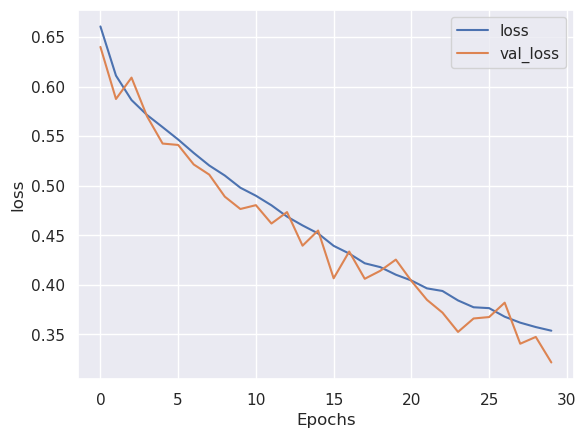

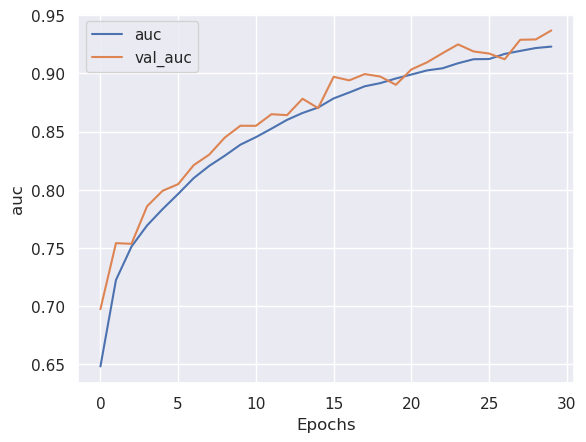

In [74]:
#showing the loss and val_los from the training data
plot_graphs(history, "loss")
#showing accuracy and val_accuracy from the training data 
plot_graphs(history, "auc")

In [75]:
#testing model
y_pred = model.predict(
    gen_batch(test, batch_size=16, shuffle=False)
)
y_pred = np.reshape(y_pred, -1)

771/771 [==============================] - 4s 5ms/step


In [76]:
#generating submission file
import pandas as pd 
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
submission.to_csv('sample_submission_walkthrough8.csv', index=False)

## Observation

My model got a score of 0.9370 in private

My model got a score of 0.80061 in kaggle

The accuracy Increased compared to trial 3 !!

SO i was expecting that because i used upsampling

but still lower than RGAT, GGNN

# Trial_9  👩‍💻 
## GNN
I used this Graph Neural Network with the data that consider very unbalanced without apply the Up-Sampling on it

After declaring the GNNInput, I defined the hyperparameters for GNN layer by loading first the defualt hyperparameters of GNN and set hidden_dim to be 8 which represent the size of the output of all message passing layers

then adding Graph Neural Network layer with the defined hyperparameters and calculating segmented mean based on segment_ids

Finally, define the output layer of the model then building and compiling the model using BinaryCrossentropy for loss and the AUC metric to measure the performance of the network.


While fitting the model I specified the value of batch size to be 32 and the value of epochs to be 32 and used the validation_set to validate our model

In [77]:
import tensorflow as tf
from tensorflow.math import segment_mean
from tensorflow import keras
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Embedding, Dense
from tensorflow.keras.optimizers import Adam

data = keras.Input(batch_shape=(None,))
# the first dim is different to the previous one. it is the total number of edges in this batch
#Input layer for edge 
#Input layer for node2graph ids
#embedding layer over data with each token embedded as  size vector
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32)
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32)
embeded = Embedding(tokenizer.num_words, 20)(data)

# number of graphs (number of samples)
num_graph = tf.reduce_max(node2graph)+1
# declare the GNNInput that take the features of node, the edge, the created list 'node2graph', and number of graphs (number of samples)
gnn_input = GNNInput(
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)

params = GNN.get_default_hyperparameters()
params["hidden_dim"] = 8
# parameter message calcualation class
gnn_layer = GNN(params)
gnn_out = gnn_layer(gnn_input)

print('gnn_out', gnn_out)
# https://www.tensorflow.org/api_docs/python/tf/math/segment_mean
avg = segment_mean(
    data=gnn_out,
    segment_ids=node2graph
)
print('mean:', avg)
#final layer is dense an its activation function is sigmoid

pred = Dense(1, activation='sigmoid')(avg)
print('pred:', pred)

model = Model(
    inputs={
        'data': data,
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred
)
model.summary()#display model's summary

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 8), dtype=tf.float32, name=None), name='gnn_8/StatefulPartitionedCall:0', description="created by layer 'gnn_8'")

mean: KerasTensor(type_spec=TensorSpec(shape=(None, 8), dtype=tf.float32, name=None), name='tf.math.segment_mean_8/SegmentMean:0', description="created by layer 'tf.math.segment_mean_8'")

pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_8/Sigmoid:0', description="created by layer 'dense_8'")

Model: "model_8"

__________________________________________________________________________________________________

 Layer (type)                   Output Shape         Param #     Connected to                     


 input_27 (InputLayer)          [(None,)]            0           []                               

                                                                                                  

 input_25 (InputLayer)          [(None,)]            0           [] 

In [78]:
#compile the model
model.compile(
    loss='BinaryCrossentropy',
    metrics=['AUC']
)

In [79]:
#fitting the model
#importing math library
import math

batch_size = 32
num_batchs = math.ceil(len(training_data) / batch_size)
num_batchs_validation = math.ceil(len(validation_set) / batch_size)

history = model.fit(
    gen_batch(
        training_data, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=30,
    validation_data=gen_batch(
        validation_set, batch_size=32, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/30

1265/1265 [==============================] - 20s 14ms/step - loss: 0.6574 - auc: 0.6537 - val_loss: 0.6326 - val_auc: 0.6934

Epoch 2/30

1265/1265 [==============================] - 17s 13ms/step - loss: 0.6232 - auc: 0.7084 - val_loss: 0.6113 - val_auc: 0.7270

Epoch 3/30

1265/1265 [==============================] - 16s 13ms/step - loss: 0.6100 - auc: 0.7275 - val_loss: 0.6036 - val_auc: 0.7436

Epoch 4/30

1265/1265 [==============================] - 17s 13ms/step - loss: 0.6022 - auc: 0.7376 - val_loss: 0.5997 - val_auc: 0.7498

Epoch 5/30

1265/1265 [==============================] - 17s 13ms/step - loss: 0.5952 - auc: 0.7455 - val_loss: 0.5920 - val_auc: 0.7522

Epoch 6/30

1265/1265 [==============================] - 16s 13ms/step - loss: 0.5924 - auc: 0.7495 - val_loss: 0.5831 - val_auc: 0.7603

Epoch 7/30

1265/1265 [==============================] - 17s 13ms/step - loss: 0.5879 - auc: 0.7531 - val_loss: 0.5835 - val_auc: 0.7595

Epoch 8/30

1265/1265 [===========

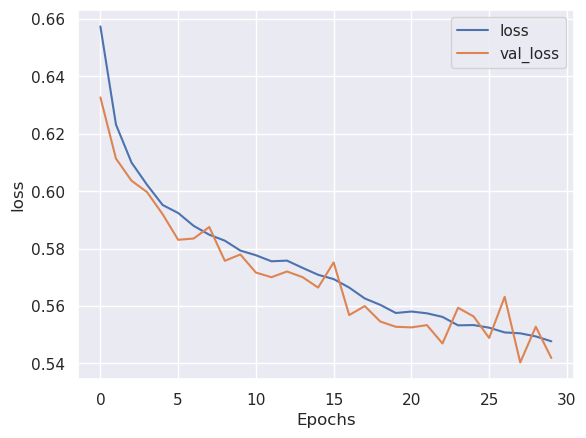

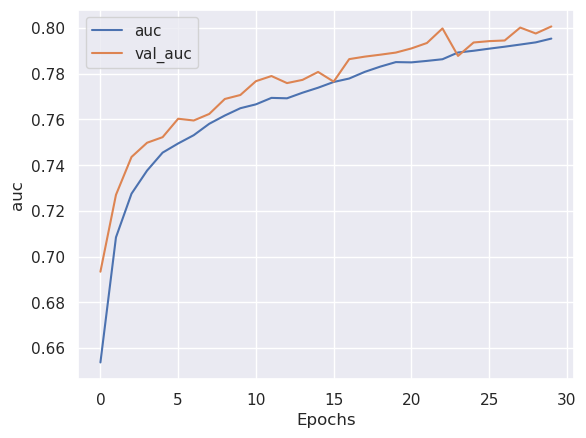

In [80]:
#showing the loss and val_los from the training data
plot_graphs(history, "loss")
#showing accuracy and val_accuracy from the training data 
plot_graphs(history, "auc")

In [81]:
#testing model
y_pred = model.predict(
    gen_batch(test, batch_size=16, shuffle=False)
)
y_pred = np.reshape(y_pred, -1)

771/771 [==============================] - 4s 4ms/step


In [82]:
len(y_pred)

12326

In [92]:
#generating submission file
import pandas as pd 
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
submission.to_csv('sample_submission_walkthrough11.csv')

## Observation
My model got a score of 0.8007 in private

My model got a score of 0.78 in kaggle

The accuracy decreased compared to RGAT in trial_6!!

BUT comparing with Trial 1 it gives better accuracy bec i used the upsampling in my preprocessing

# Trial_10  👩‍💻 
## RGIN
I used this Graph Neural Network with the Up-Sampled data, in addition to applying one of the GCN aggregation mechanisms by tuning the message_passing mechanisms and configure the message passing style to be RGIN

After declaring the GNNInput, I defined the hyperparameters for GNN layer by loading the defualt hyperparameters of GNN and set hidden_dim to be 32 which represent the size of the output of all message passing layers, and set message_calculation_class parameter to be RGIN, and set the num_aggr_MLP_hidden_layers to be 2 as it is required parameter for RGIN

then adding Graph Neural Network layer with the defined hyperparameters and calculating segmented mean based on segment_ids

Finally, define the output layer of the model then building and compiling the model using BinaryCrossentropy for loss and the AUC metric to measure the performance of the network.


While fitting the model I specified the value of batch size to be 32 and the value of epochs to be 32 and used the validation_set to validate our model



In [28]:
import tensorflow as tf
from tensorflow.math import segment_mean
from tensorflow import keras
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Embedding, Dense
from tensorflow.keras.optimizers import Adam

data = keras.Input(batch_shape=(None,))

# the first dim is different to the previous one. it is the total number of edges in this batch
#Input layer for edge 
#Input layer for node2graph ids
#embedding layer over data with each token embedded as  size vector
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32)
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32)
embeded = Embedding(tokenizer.num_words, 20)(data)

# number of graphs (number of samples)
num_graph = tf.reduce_max(node2graph)+1

# declare the GNNInput that take the features of node, the edge, the created list 'node2graph', and number of graphs (number of samples)
gnn_input = GNNInput(
    node_features = embeded,
    adjacency_lists = (edge,),
    node_to_graph_map = node2graph, 
    num_graphs = num_graph,
)


# configure the hyperparameters of GNN layers
# https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py
# 
# frist load the defualt hyperparameters
params = GNN.get_default_hyperparameters()
# sets the size of the output of all message passing layers
params["hidden_dim"] = 32
# configures the message passing style to be RGIN (Relational Graph Isomorphism Networks)
params['message_calculation_class'] = 'RGIN'
params['num_aggr_MLP_hidden_layers'] = 2

# Implements a deep Graph Neural Network
gnn_layer = GNN(params)
gnn_out = gnn_layer(gnn_input)



# Computes the mean along segments of a tensor
# https://www.tensorflow.org/api_docs/python/tf/math/segment_mean
avg = segment_mean(
    data = gnn_out,
    segment_ids = node2graph
)

# Define the out put layer of the model
pred = Dense(1, activation='sigmoid')(avg)


# Creating the model
model = Model(
    inputs = {
        'data': data,
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs = pred
)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 tf.math.reduce_max (TFOpLambda  ()                  0           ['input_3[0][0]']                
 )                                                                                                
                                                                                                  
 embedding (Embedding)          (None, 20)           10000       ['input_1[0][0]']            

In [29]:
#compile the model
model.compile(
    loss='BinaryCrossentropy',
    metrics=['AUC']
)

In [30]:
#fitting the model
#importing math library
import math

batch_size = 32
num_batchs = math.ceil(len(training_data) / batch_size)
num_batchs_validation = math.ceil(len(validation_set) / batch_size)

history =model.fit(
    gen_batch(
        training_data, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=30,
    validation_data=gen_batch(
        validation_set, batch_size=32, repeat=True
    ),
    validation_steps=num_batchs_validation,
)
     

Epoch 1/30
1265/1265 [==============================] - 31s 17ms/step - loss: 0.6526 - auc: 0.6580 - val_loss: 0.6257 - val_auc: 0.7123
Epoch 2/30
1265/1265 [==============================] - 21s 16ms/step - loss: 0.6066 - auc: 0.7305 - val_loss: 0.5927 - val_auc: 0.7521
Epoch 3/30
1265/1265 [==============================] - 22s 17ms/step - loss: 0.5886 - auc: 0.7536 - val_loss: 0.5947 - val_auc: 0.7542
Epoch 4/30
1265/1265 [==============================] - 20s 16ms/step - loss: 0.5735 - auc: 0.7740 - val_loss: 0.5701 - val_auc: 0.7853
Epoch 5/30
1265/1265 [==============================] - 21s 17ms/step - loss: 0.5574 - auc: 0.7875 - val_loss: 0.5552 - val_auc: 0.7911
Epoch 6/30
1265/1265 [==============================] - 21s 17ms/step - loss: 0.5460 - auc: 0.7990 - val_loss: 0.5308 - val_auc: 0.8260
Epoch 7/30
1265/1265 [==============================] - 20s 16ms/step - loss: 0.5403 - auc: 0.8052 - val_loss: 0.5377 - val_auc: 0.8107
Epoch 8/30
1265/1265 [==========================

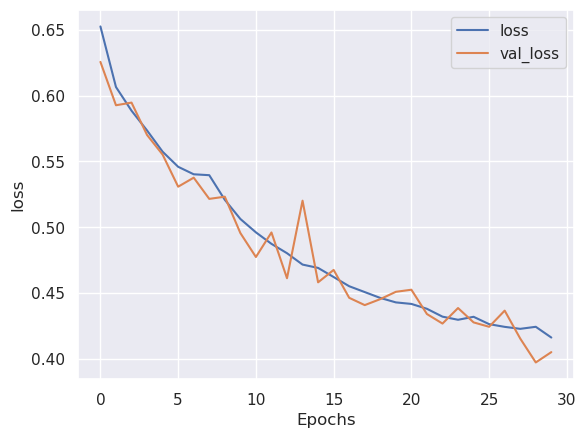

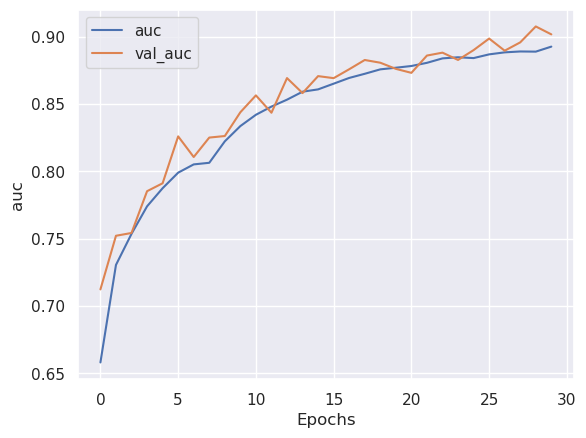

In [31]:
#showing the loss and val_los from the training data
plot_graphs(history, "loss")
#showing accuracy and val_accuracy from the training data 
plot_graphs(history, "auc")

In [32]:
#testing model
y_pred = model.predict(
    gen_batch(test, batch_size=16, shuffle=False)
)
y_pred = np.reshape(y_pred, -1)
     

771/771 [==============================] - 4s 5ms/step


In [33]:
#generating submission file
import pandas as pd 
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
submission.to_csv('sample_submission_walkthrough10.csv')

## Observation
My model got a score of 0.9018 in private

My model got a score of 0.82 in kaggle

The accuracy decreased compared to RGAT in trial_6!!

BUT comparing with Trial 5 it gives better accuracy bec i used the upsampling in my preprocessing